In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numpy.random as npr
import logistic_svd.numba_version

import matplotlib.pylab as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1d factor model

In [5]:
# generate some simulated data
Nc=5000
Ng=40
Nk=1
z=npr.randn(Nc,Nk)
alpha=npr.randn(Ng,Nk)
data = npr.rand(Nc,Ng) < (1 / (1+np.exp(-z@alpha.T)))

# fit model to simulated data
z_guess,alpha_guess,likelihoods=logistic_svd.numba_version.train(Nk,10,binary_matrix=data,approx=True)

# for comparison with the truth,
# use the true parameters to
# flip our estimates to the right sign
# (this orientation is not identifiable)
if np.sum(alpha_guess*alpha)<0:
    alpha_guess=-alpha_guess
    z_guess=-z_guess

out of 10: 
0 1 2 3 4 5 6 7 8 9 ...done


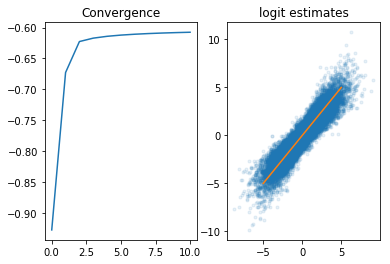

In [9]:
plt.subplot(1,2,1)
plt.plot(likelihoods)
plt.title("Convergence")


plt.subplot(1,2,2)
plt.plot((z_guess@alpha_guess.T).ravel(),(z@alpha.T).ravel(),'.',alpha=.1)
plt.title("logit estimates")
plt.plot([-5,5],[-5,5])


# bigger model

In [10]:
# simulated data
Nc=100
Ng=400
Nk=10
z=npr.randn(Nc,Nk)
alpha=npr.randn(Ng,Nk)
data = npr.rand(Nc,Ng) < (1 / (1+np.exp(-z@alpha.T)))

# fit model to data
z_guess,alpha_guess,likelihoods=logistic_svd.numba_version.train(Nk,10,binary_matrix=data)

out of 10: 
0 1 2 3 4 5 6 7 8 9 ...done


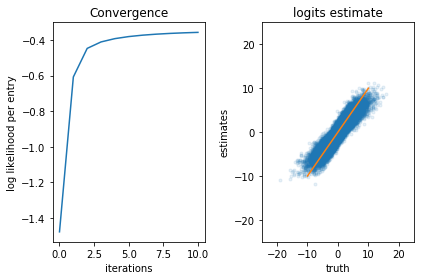

In [11]:
plt.subplot(1,2,1)
plt.plot(likelihoods)
plt.title("Convergence")
plt.xlabel("iterations")
plt.ylabel("log likelihood per entry")

plt.subplot(1,2,2)
plt.plot((z@alpha.T).ravel(),(z_guess@alpha_guess.T).ravel(),'.',alpha=.1)
plt.ylabel('estimates')
plt.xlabel("truth")
plt.plot([-10,10],[-10,10])
plt.title("logits estimate")
plt.xlim(-25,25)
plt.ylim(-25,25)

plt.tight_layout()

# model that needs regularization

If ther are many more genes than cells, we will 

out of 50: 
0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 ...done
out of 50: 
0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 ...done


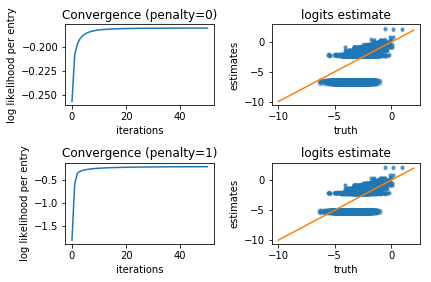

In [44]:
# simulated data
Nc=10
Ng=4000
Nk=1
z=npr.randn(Nc,Nk)
alpha=npr.randn(Ng,Nk)

z[:,0]=1
alpha[:,0]=npr.randn(Ng)-3

data = npr.rand(Nc,Ng) < (1 / (1+np.exp(-z@alpha.T)))


# fit model to data
for penalty in [0,1]:
    z_guess,alpha_guess,likelihoods=logistic_svd.numba_version.train(Nk,50,binary_matrix=data,penalty=penalty)

    plt.subplot(2,2,1+penalty*2)
    plt.plot(likelihoods)
    plt.title("Convergence (penalty=%d)"%penalty)
    plt.xlabel("iterations")
    plt.ylabel("log likelihood per entry")

    plt.subplot(2,2,2+penalty*2)
    plt.plot((z@alpha.T).ravel(),(z_guess@alpha_guess.T).ravel(),'.',alpha=.1)
    plt.ylabel('estimates')
    plt.xlabel("truth")
    plt.plot([-10,2],[-10,2])
    plt.title("logits estimate")

    plt.tight_layout()

(array([  130.,   850.,  3490.,  8280., 11980.,  8980.,  4630.,  1410.,
          220.,    30.]),
 array([-8.42390348, -7.68151469, -6.9391259 , -6.19673711, -5.45434831,
        -4.71195952, -3.96957073, -3.22718194, -2.48479314, -1.74240435,
        -1.00001556]),
 <a list of 10 Patch objects>)

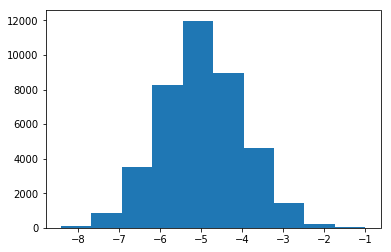

In [40]:
plt.hist((z@alpha.T).ravel())

In [43]:
np.mean(np.mean(data,axis=0)==0),np.mean(np.mean(data,axis=1)==0)

(0.9025, 0.0)

In [35]:
np.mean(data)

0.49905

(array([  5.,   0.,   0.,  56.,   0.,   0., 235.,   0.,   0., 507.,   0.,
          0., 792.,   0.,   0., 803.,   0.,   0., 760.,   0.,   0., 529.,
          0.,   0., 260.,   0.,   0.,  47.,   0.,   6.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

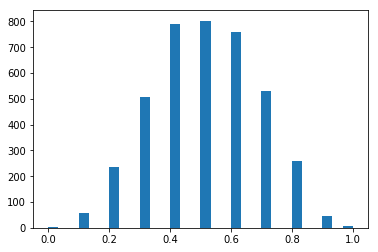

In [25]:
plt.hist(np.mean(data,axis=0),bins=30)

# using lower-level functions

In [8]:
# simulated data
Nc=1000
Ng=4000
Nk=10
z=npr.randn(Nc,Nk)
alpha=npr.randn(Ng,Nk)
data = npr.rand(Nc,Ng)< (1 / (1+np.exp(-z@alpha.T)))
dmhalf=data-.5

In [11]:
# SVD for initial conditions
import scipy.sparse.linalg
U,e,V = scipy.sparse.linalg.svds(dmhalf,Nk)

z_guess=U@np.diag(e)
alpha_guess=V.T
logits=z@alpha.T
alpha_guess2=logistic_svd.numba_version.update_alpha(dmhalf,z_guess,alpha_guess,0)

print("likelihood under true model\t\t",logistic_svd.numba_version.likelihood(dmhalf,z,alpha))
print("initial likelihood\t\t\t",logistic_svd.numba_version.likelihood(dmhalf,z_guess,alpha_guess))

alpha_guess2=logistic_svd.numba_version.update_alpha(dmhalf,z_guess,alpha_guess,0)
print("likelihood after updating alpha\t\t",logistic_svd.numba_version.likelihood(dmhalf,z_guess,alpha_guess2))

z_guess2=logistic_svd.numba_version.update_z(dmhalf,z_guess,alpha_guess2,0)
print("likelihood after updating alpha and z\t",logistic_svd.numba_version.likelihood(dmhalf,z_guess2,alpha_guess2))


likelihood under true model		 -0.361890452477623
initial likelihood			 -0.586152345502795
likelihood after updating alpha		 -0.41035929210575645
likelihood after updating alpha and z	 -0.3809995936563908


# inspecting the minorization we use

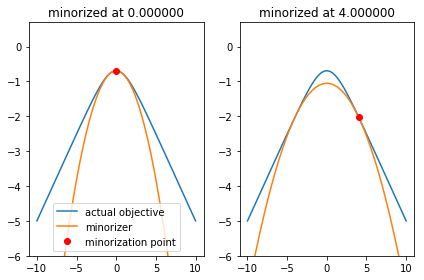

In [25]:
plt.subplot(1,2,1)
xs=np.r_[-10:10:100j]
plt.plot(xs,-np.log(2*np.cosh(xs/2)),label='actual objective')
x0=0
M,k=logistic_svd.numba_version.calc_minorizer(x0)
plt.plot(xs,k-.5*M*xs**2,label='minorizer')
plt.plot([x0],[-np.log(2*np.cosh(x0/2))],'ro',label='minorization point')
plt.legend()
plt.ylim(-6,np.log(2))

plt.title('minorized at %f'%x0)
    
    
plt.subplot(1,2,2)
plt.plot(xs,-np.log(2*np.cosh(xs/2)))
x0=4
M,k=logistic_svd.numba_version.calc_minorizer(x0)
plt.plot(xs,k-.5*M*xs**2)
plt.plot([x0],[-np.log(2*np.cosh(x0/2))],'ro')
plt.ylim(-6,np.log(2))

plt.title('minorized at %f'%x0)

plt.tight_layout()